In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [10]:
#loding data set
df = pd.read_csv("People Charm case.csv")
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


## Checking the condition of data

In [11]:
#checking Duplicates
df.duplicated().sum()

3008

In [12]:
# Droping Duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
#!pip install pandas_profiling
import pandas_profiling as pd_prof

In [15]:
pd_prof.ProfileReport(df)

## Label Encoding the Categorical Columns

In [17]:
le = LabelEncoder()
df["dept"] = le.fit_transform(df['dept'])
df["salary"] = le.fit_transform(df['salary'])

In [18]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [19]:
Y = df.left
X = df.drop('left', axis=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## KNN Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("KNN Score =", knn.score(x_test,y_test)*100)
prediction = knn.predict(x_test)

KNN Score = 93.78907878282618


In [22]:
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix is :", cm, sep='\n')

Confusion Matrix is :
[[1911   96]
 [  53  339]]


In [23]:
from sklearn import metrics

probs = knn.predict_proba(x_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

Area under the curve is 0.9307856176850412


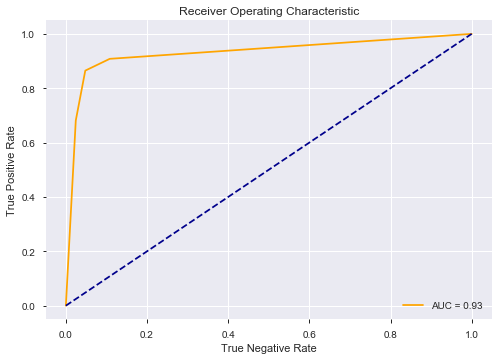

In [24]:
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is  0.8445185493955815
Confusion Matrix is :
[[1944   63]
 [ 310   82]]


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under the curve is 0.8326291652684991


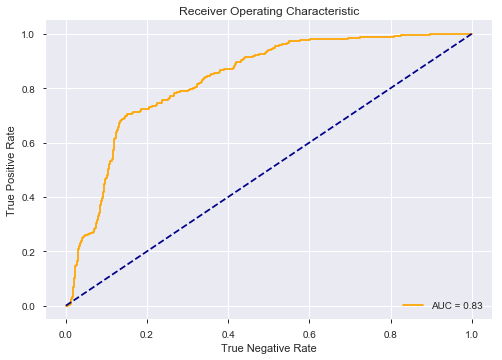

In [26]:
probs_lr = lr.predict_proba(x_test)
prob_positive = probs_lr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Bernoulli Naive Bayes

In [27]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 83.65985827428095
Confusion Matrix is :
[[2007    0]
 [ 392    0]]


Area under the curve is 0.8326291652684991


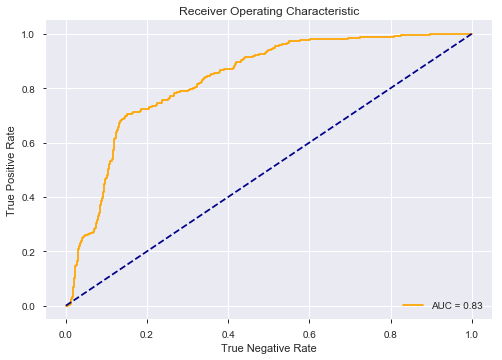

In [28]:
probs_bnb = bnb.predict_proba(x_test)
prob_positive = probs_lr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Decision Tree Classification 

In [29]:
df = pd.read_csv("People Charm case.csv")

In [30]:
Y = df.left
X = df.drop('left', axis=1)

### One Hot Encoding

In [31]:
X_dummies= pd.get_dummies(X)
X_dummies.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [32]:
x_train,x_test,y_train,y_test= train_test_split(X_dummies,Y,test_size=0.2,random_state=0)

In [33]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred= dtc.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 98.1
Confusion Matrix is :
[[2216   35]
 [  22  727]]


Area under the curve is 0.977539429145569


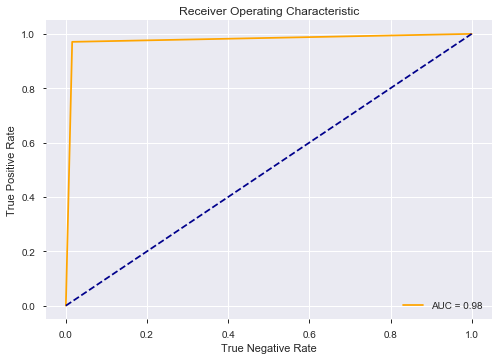

In [34]:
probs_dtc = dtc.predict_proba(x_test)
prob_positive = probs_dtc[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Random Forest Classification

In [35]:
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 99.2
Confusion Matrix is :
[[2247    4]
 [  20  729]]


Area under the curve is 0.9942760938766868


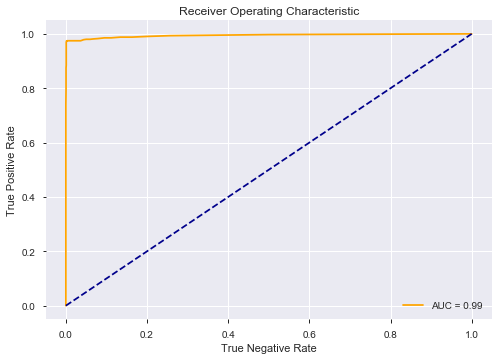

In [36]:
probs_rf = rf.predict_proba(x_test)
prob_positive = probs_rf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## AdaBoost Classification

In [37]:
ab = AdaBoostClassifier(n_estimators = 100, random_state=0)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 96.0
Confusion Matrix is :
[[2193   58]
 [  62  687]]


Area under the curve is 0.9826103099705279


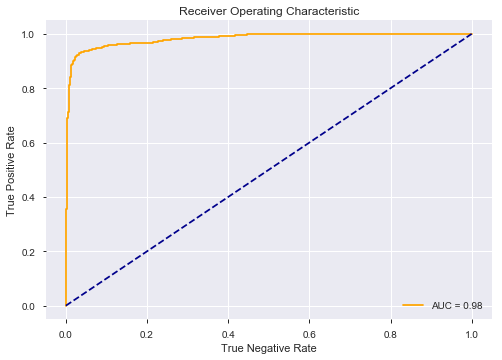

In [38]:
probs_ab = ab.predict_proba(x_test)
prob_positive = probs_ab[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Gradient Boost Classification

In [39]:
gb = GradientBoostingClassifier(n_estimators = 100, random_state=0)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 97.56666666666666
Confusion Matrix is :
[[2229   22]
 [  51  698]]


Area under the curve is 0.9890845130987622


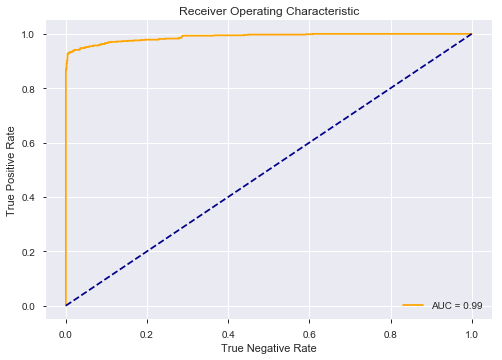

In [40]:
probs_gb = gb.predict_proba(x_test)
prob_positive = probs_gb[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## XGBoost Classification

In [41]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 97.6
Confusion Matrix is :
[[2231   20]
 [  52  697]]


Area under the curve is 0.9891129828665378


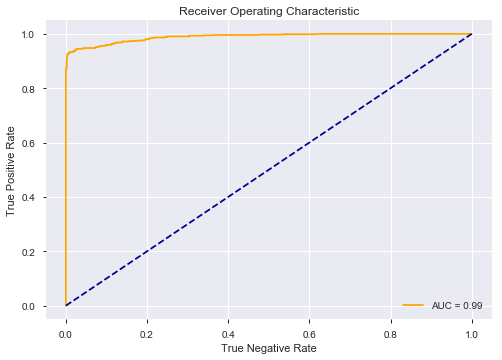

In [42]:
probs_xg = xg.predict_proba(x_test)
prob_positive = probs_xg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Conclusion

**The Random Forest Classification technique is giving the best accuracy because this algorithm creates multiple samples inside the dataset and creates a Decision Tree for each one. Then among all the results, this algorithm chooses the class which is predicted by most number of sample trees. So, by virtue of multiple trees being created, there is much more learning and hence the better accuracy**

**Accuracy is NOT enough to evaluate the performance of the metric. For example, in Bernoulli Naive Bayes, the Confusion Matrix is :
[[2007    0]
 [ 392    0]]
This clearly shows that our model is unable to classify actual class 0. Whereas we are getting Accuracy = 83.65985827428095 for this algo, which is good enough. If we don't take a look at confusion matrix, and rely only on accuracy then we will make wrong predictions.**